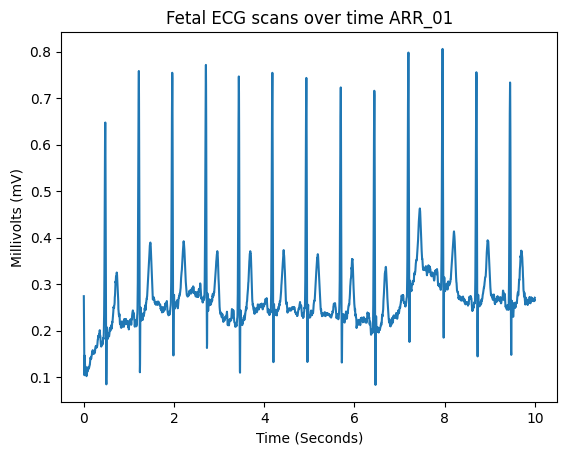

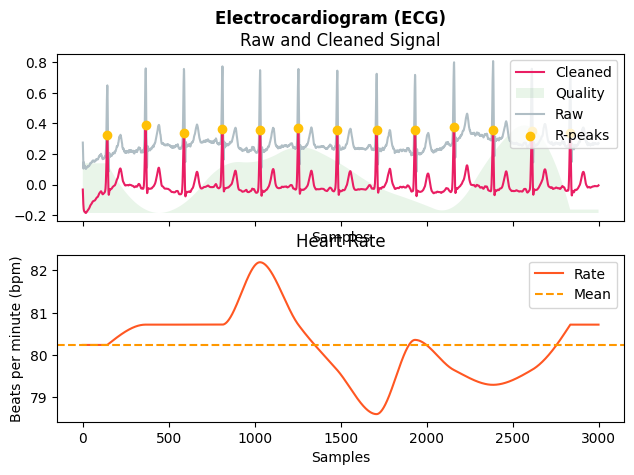

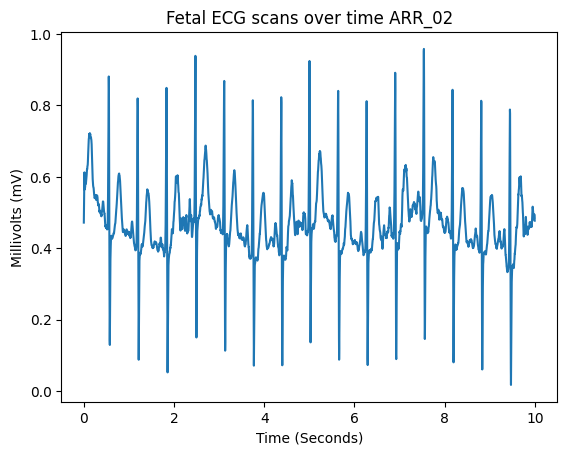

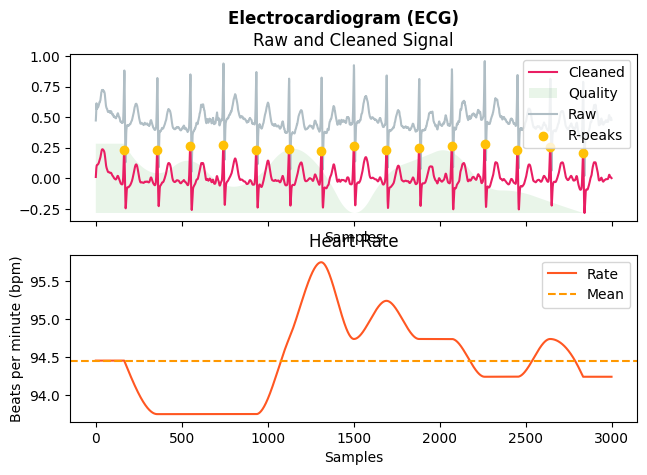

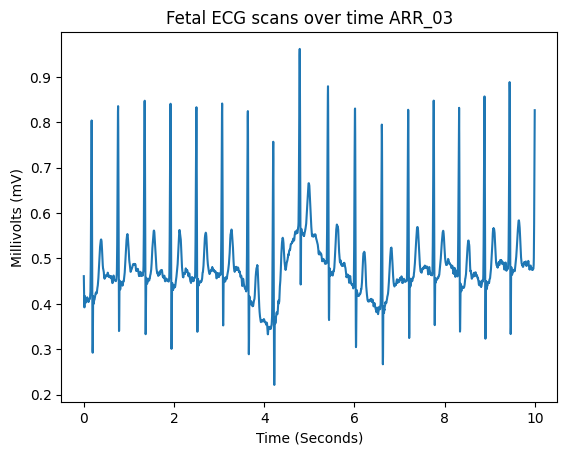

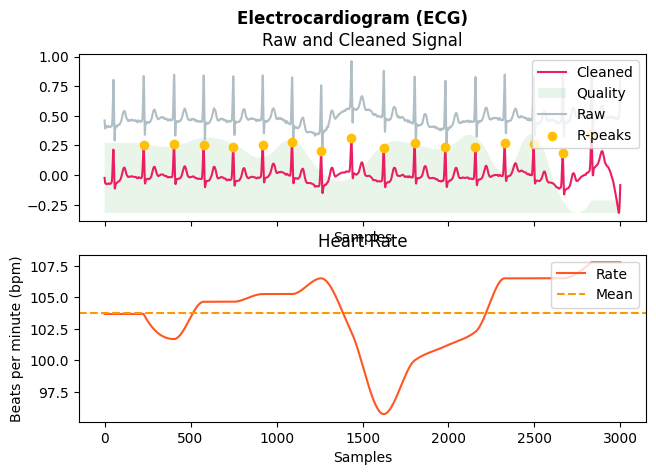

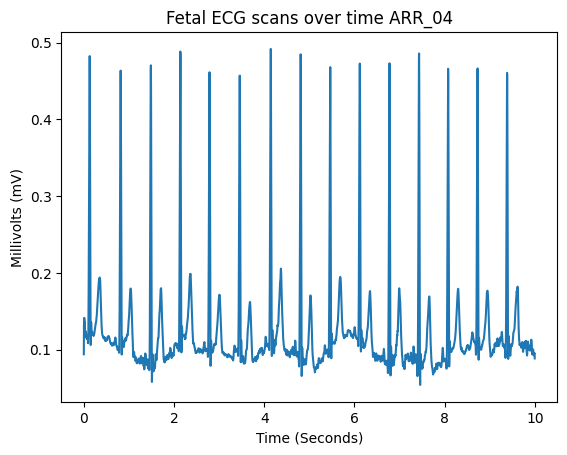

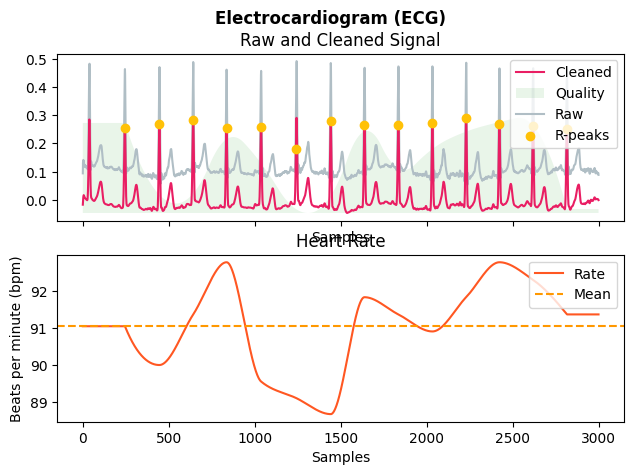

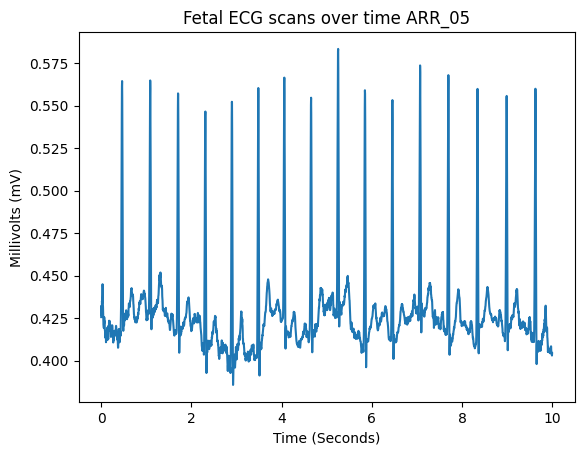

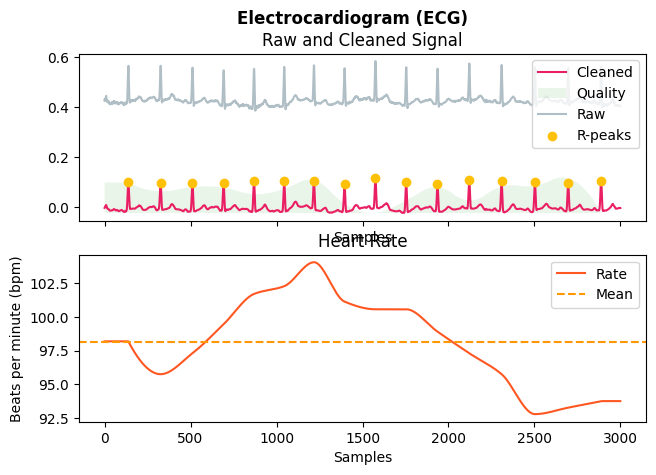

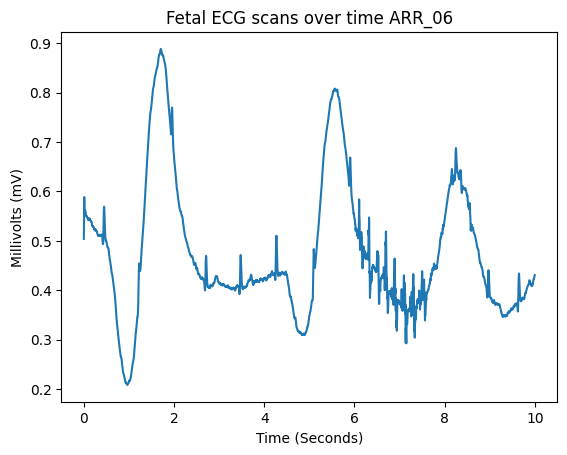

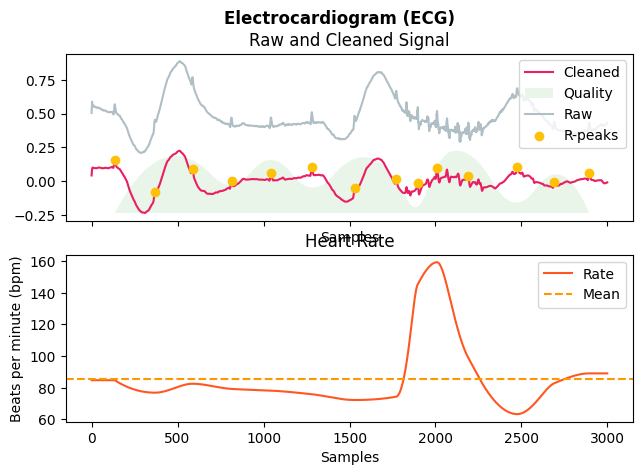

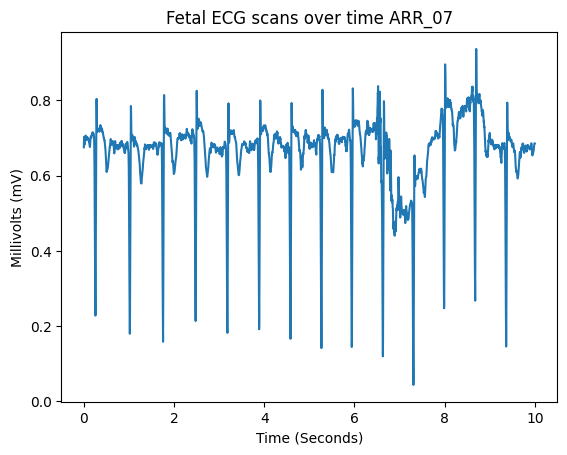

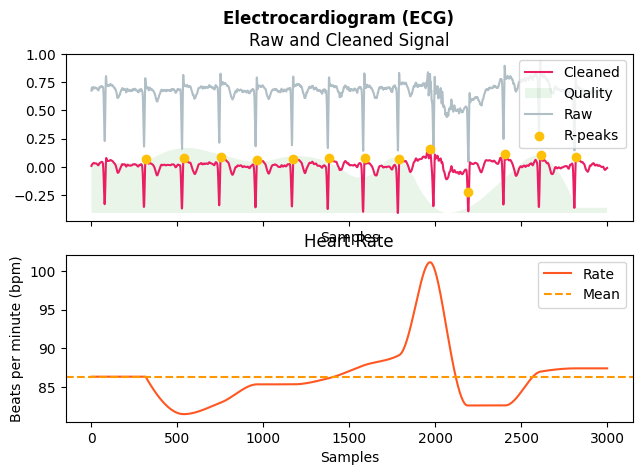

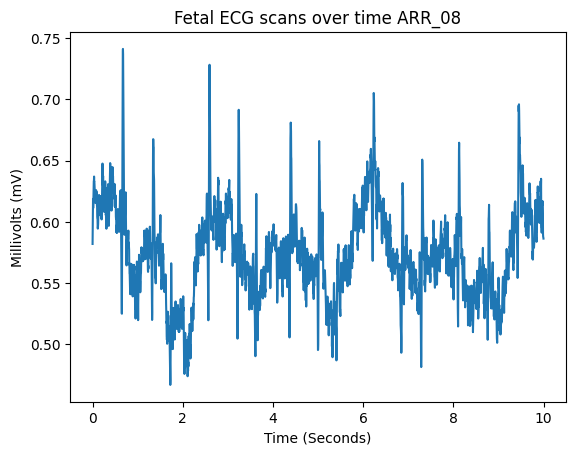

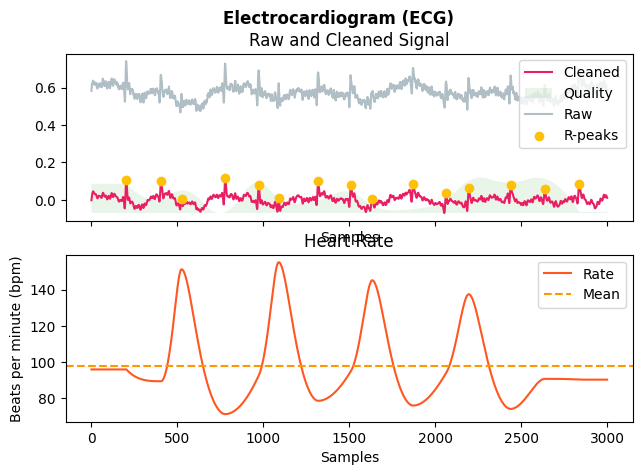

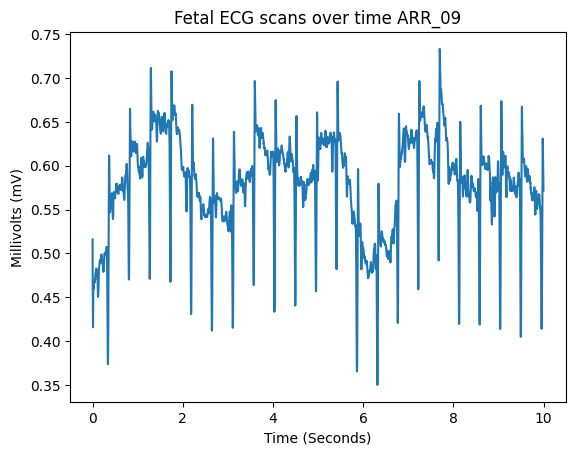

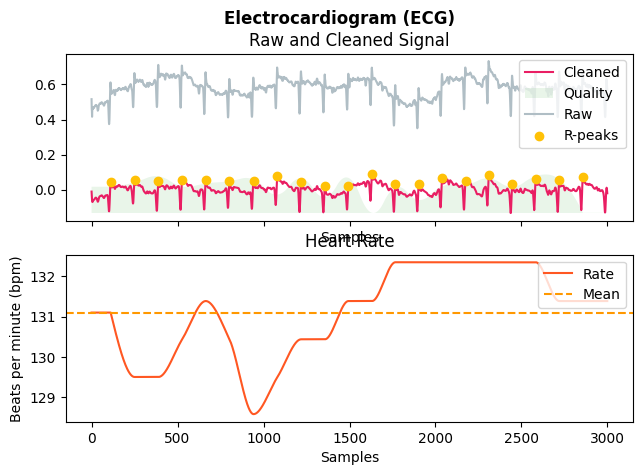

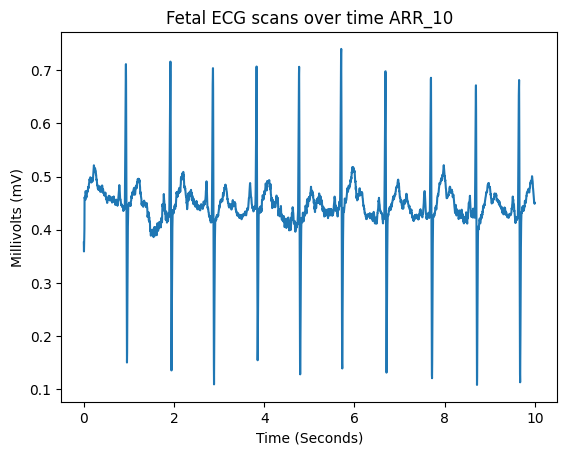

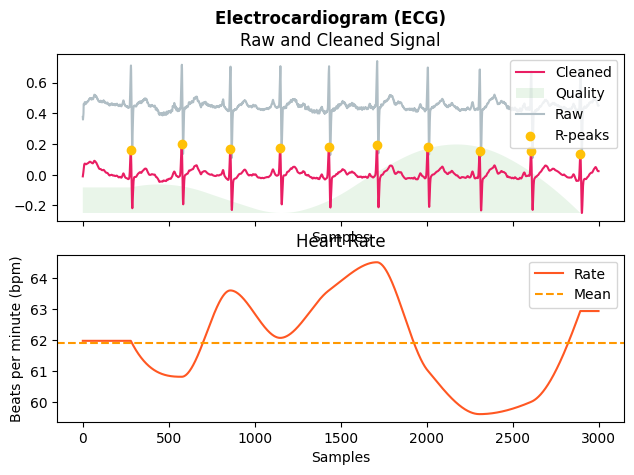

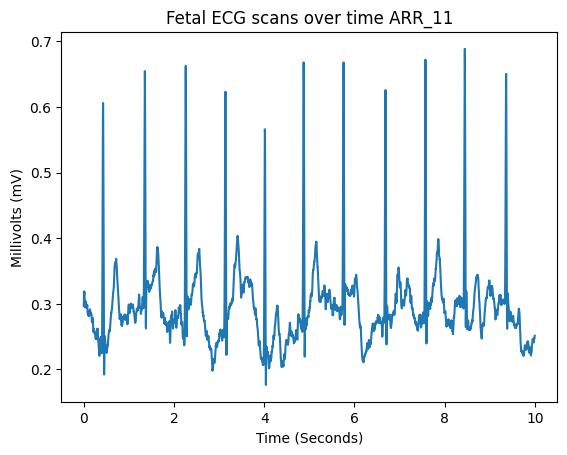

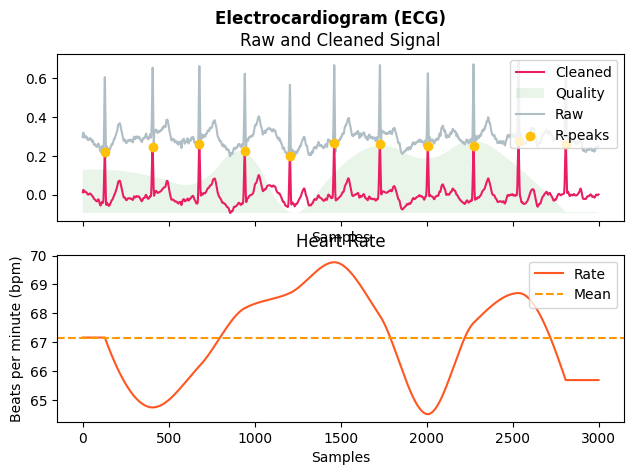

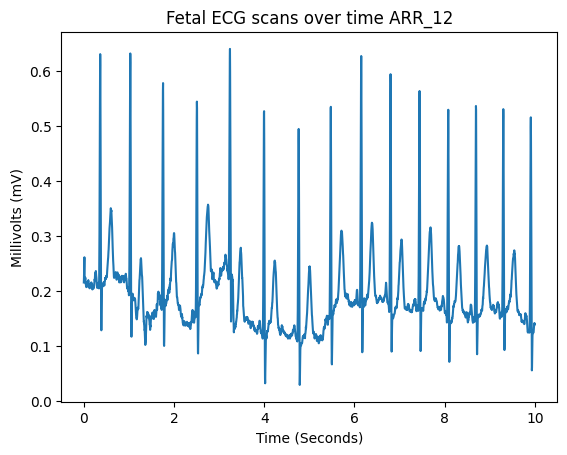

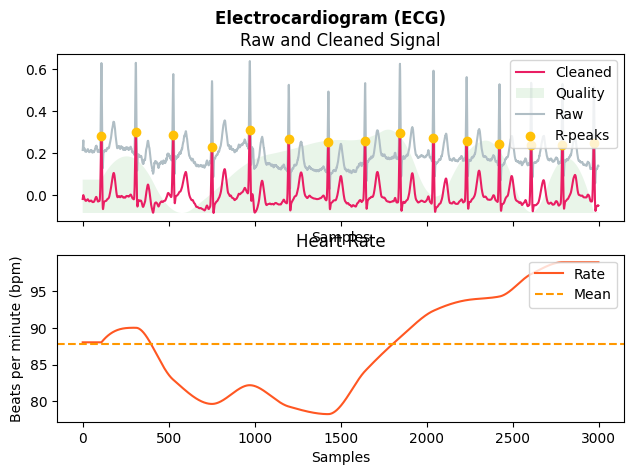

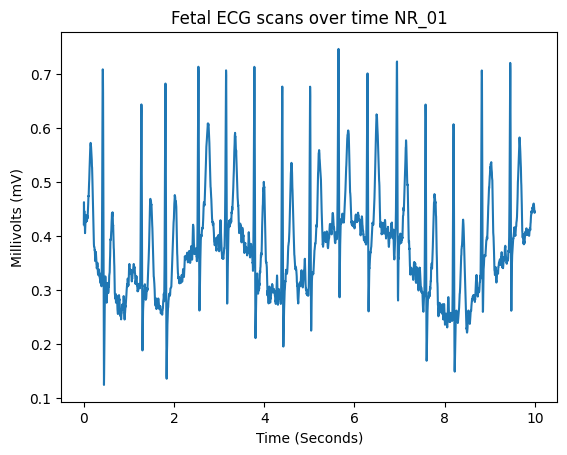

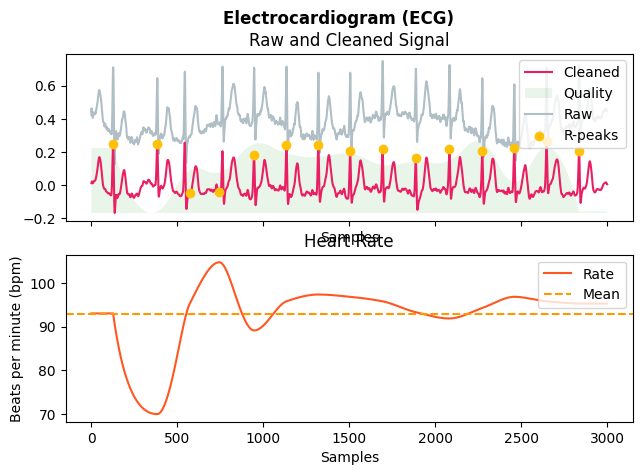

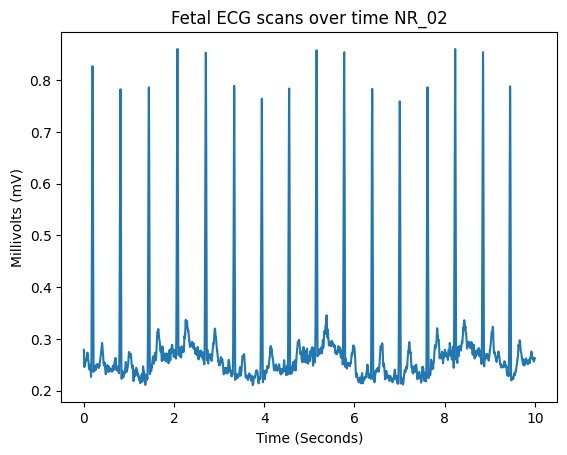

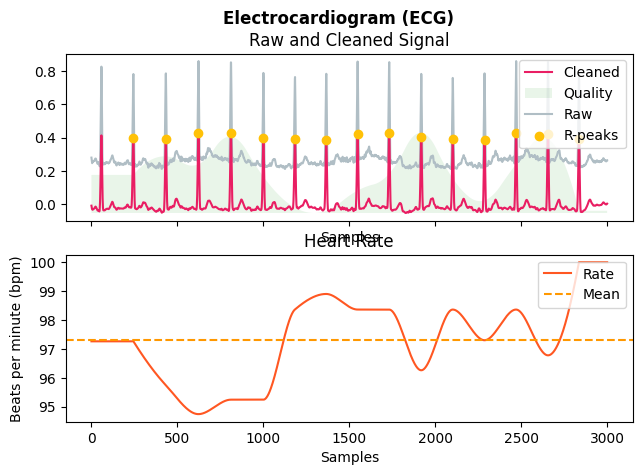

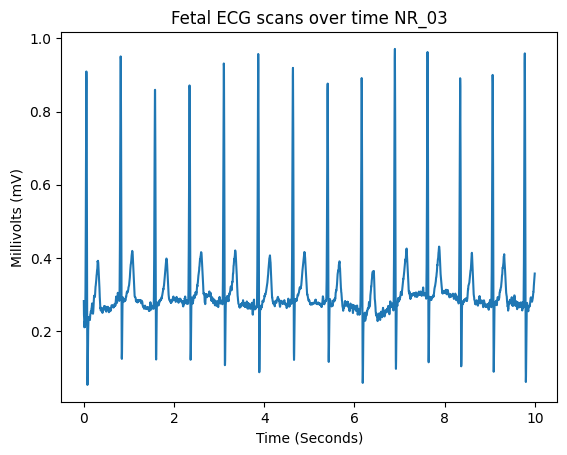

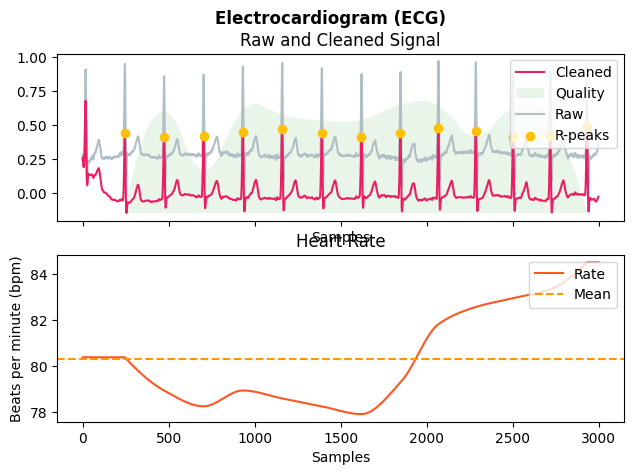

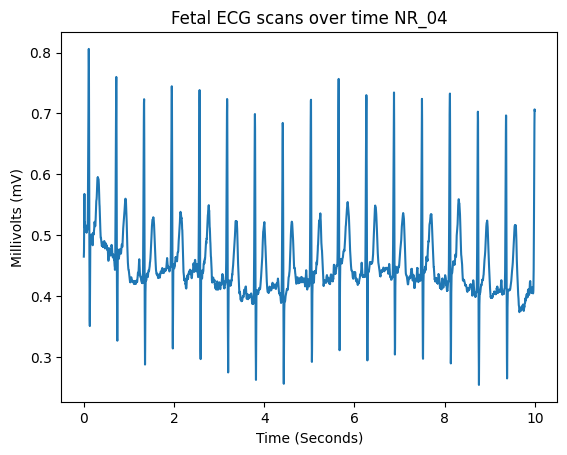

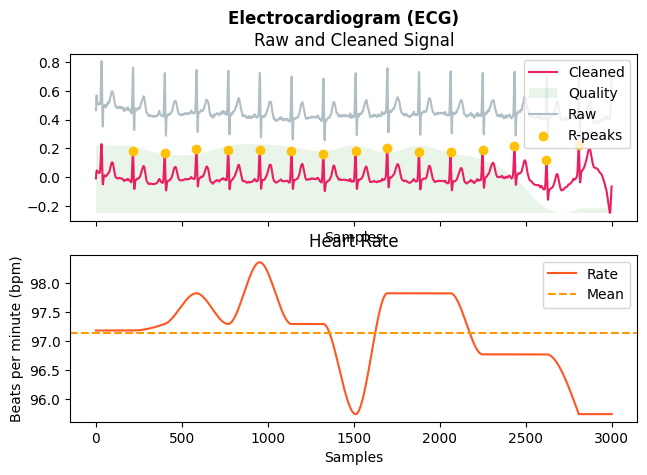

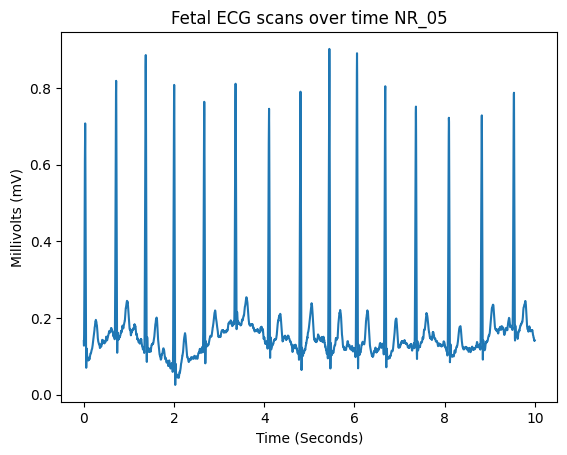

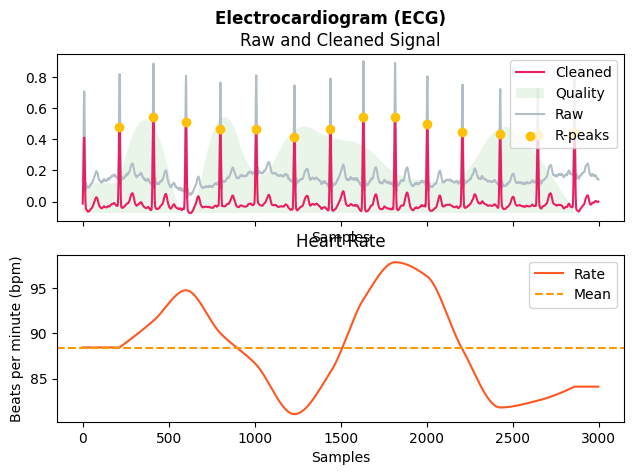

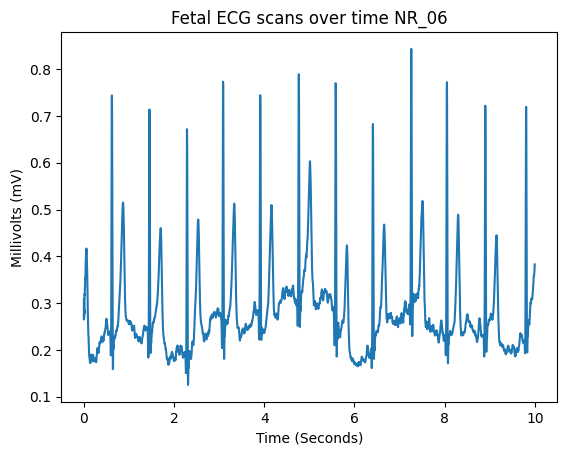

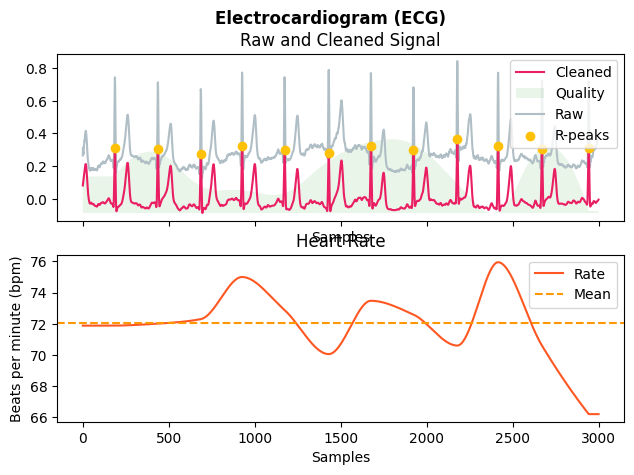

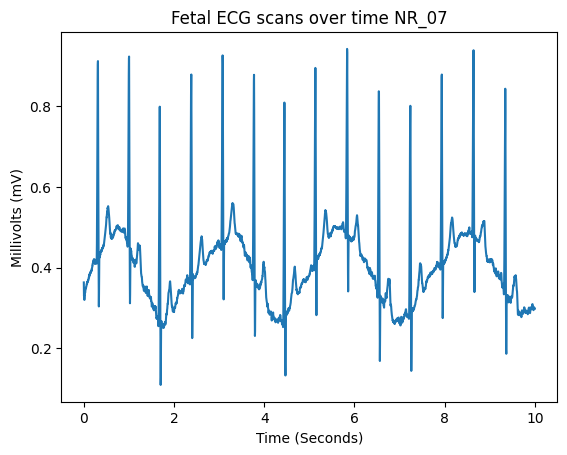

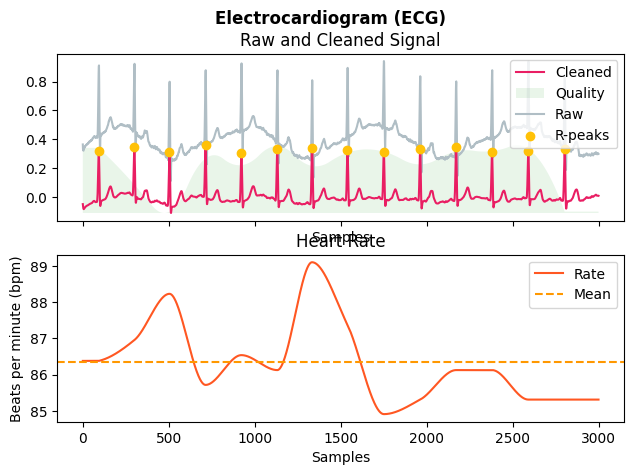

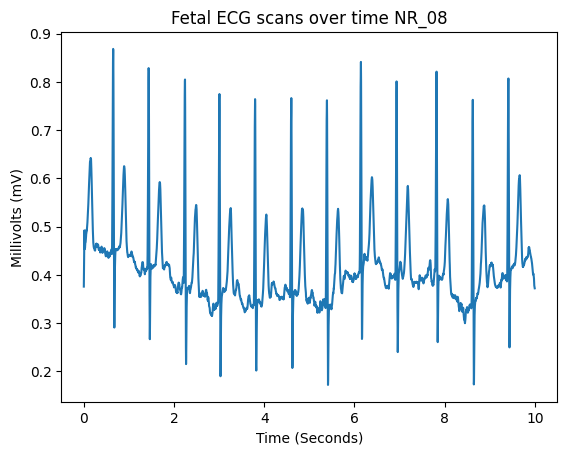

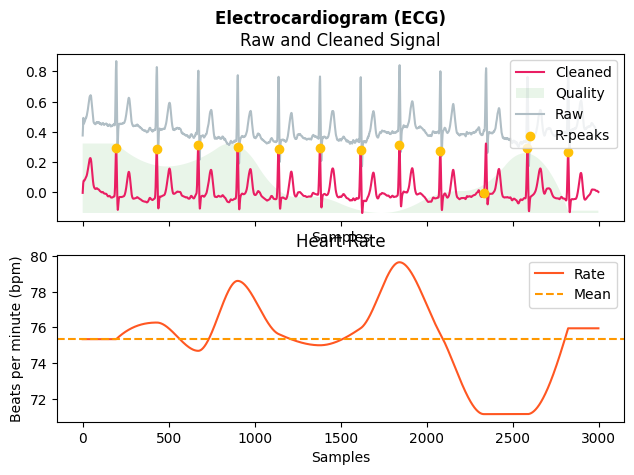

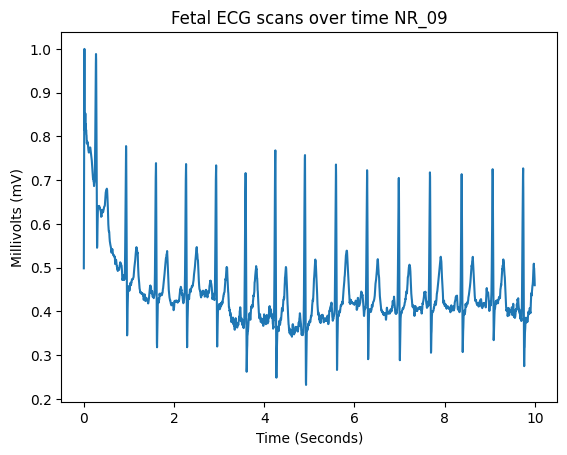

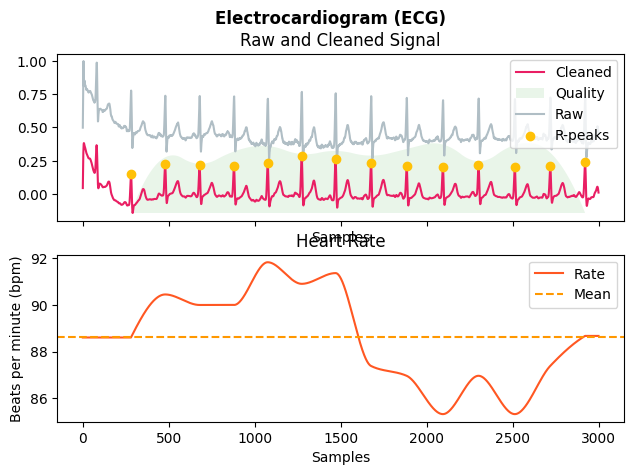

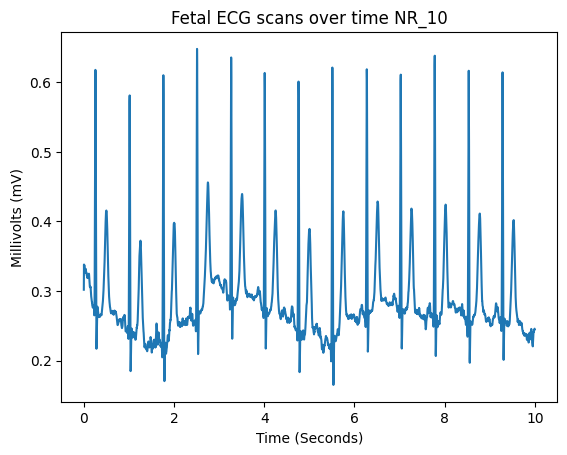

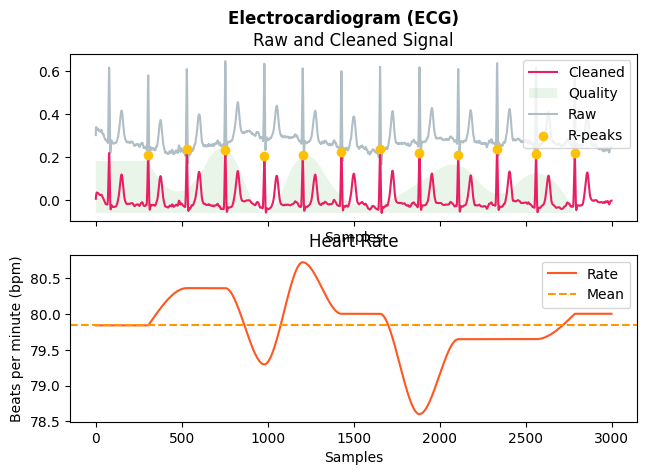

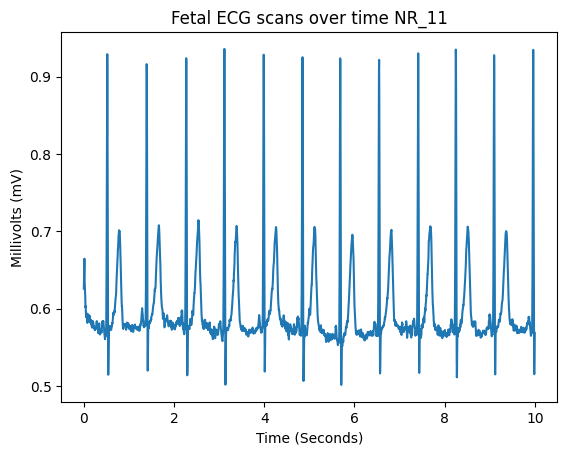

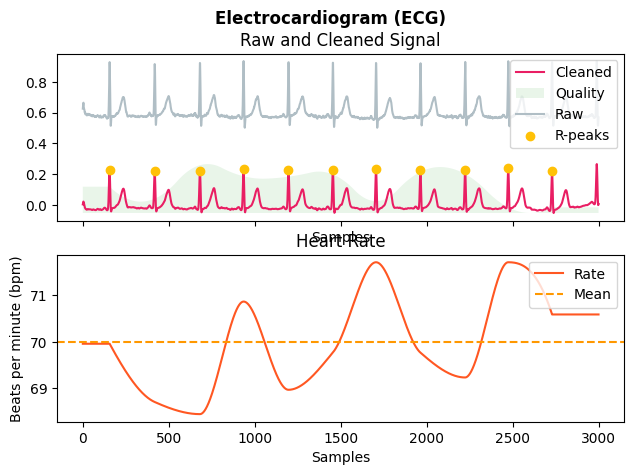

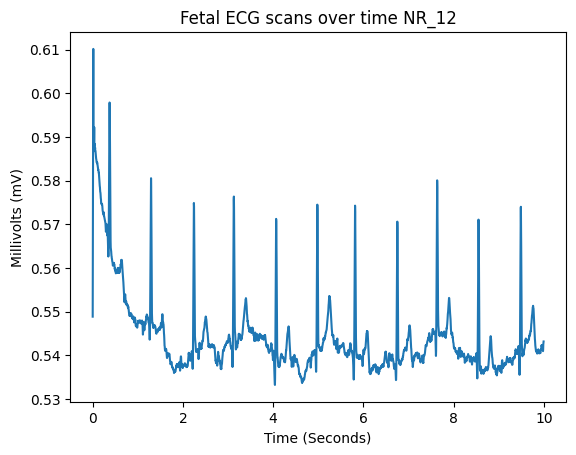

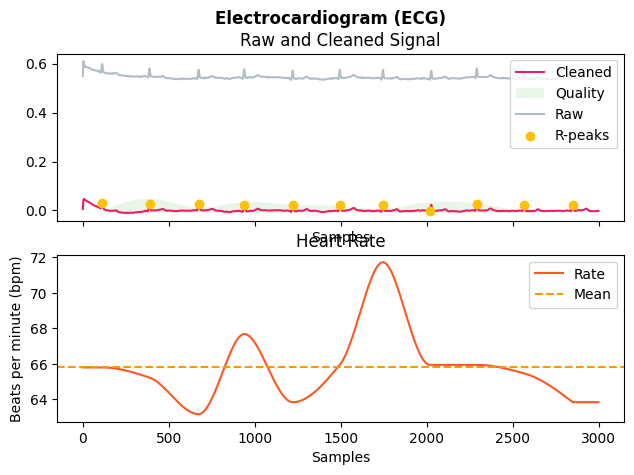

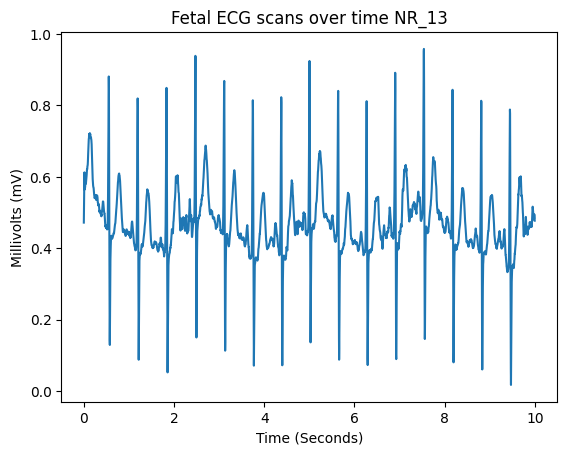

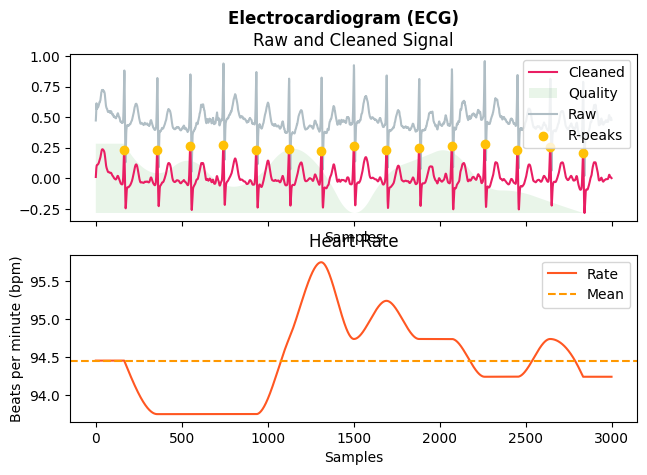

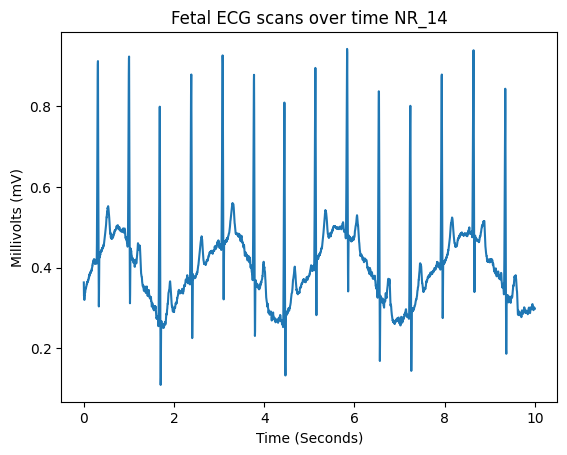

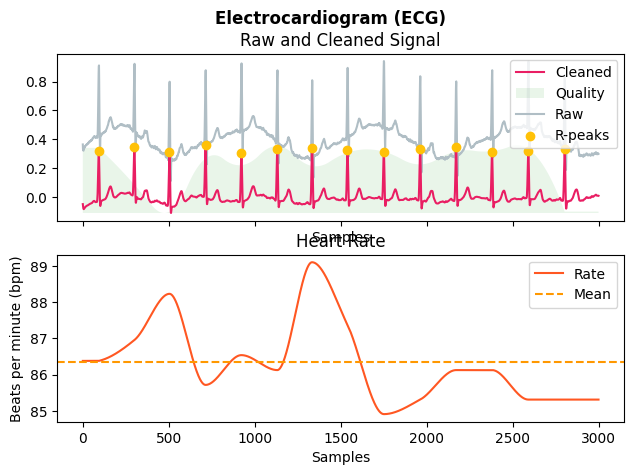

In [1]:
import matplotlib.pyplot as plt
import wfdb
import numpy as np
from scipy import signal
import neurokit2 as nk
import pandas as pd
import statistics

#extract time domain and QRSTP peaks 
def feature_extraction(signal,sampling_rate):
    processed_sig, _ = nk.ecg_process(signal,sampling_rate, method='neurokit')
    nk.ecg_plot(processed_sig)
    
    cleaned_signal = processed_sig["ECG_Clean"]
    time_domain_features = [float(min(cleaned_signal)),float(max(cleaned_signal)),float(statistics.mean(cleaned_signal)),float(statistics.stdev(cleaned_signal))]
    
    r_peaks = processed_sig["ECG_R_Peaks"]
    r_peak_values = normalized_data[r_peaks]
    
    p_peaks = processed_sig["ECG_P_Peaks"]
    p_peak_values = normalized_data[p_peaks]

    q_peaks = processed_sig["ECG_Q_Peaks"]
    q_peak_values = normalized_data[q_peaks]

    s_peaks = processed_sig["ECG_S_Peaks"]
    s_peak_values = normalized_data[s_peaks]

    t_peaks = processed_sig["ECG_T_Peaks"]
    t_peak_values = normalized_data[t_peaks]
    
#resample the data 
def resample_signal(data,fs, new_fs):
    current_frequency = fs
    nyquist_frequency = new_fs
    
    frequency_ratio = nyquist_frequency/current_frequency
    total_resampled_samples = int(len(data)*(frequency_ratio))

    sampled_data = signal.resample(data, total_resampled_samples)
    return sampled_data

#normalize the signal
def normalize(data):

    minimum = np.min(data)
    maximum = np.max(data)

    data  = (data - minimum)/(maximum-minimum)
    return data

#plot the signal
def plot_signal(data, fs, seconds, signal_count, record_name):
    
    plt.title("Fetal ECG scans over time " + record_name)
    plt.xlabel("Time (Seconds)")
    plt.ylabel("Millivolts (mV)")

    x = np.arange(0, len(data))/fs
    plt.plot(x[0:seconds*fs], data[0:seconds*fs,0:signal_count])
    plt.show()

#store file paths of all 26 data sets in a list by accessing file records 
records_file_path = 'non-invasive-fetal-ecg-arrhythmia-database-1.0.0/RECORDS'
with open(records_file_path, 'r') as f:
    record_names = f.read().splitlines()

#iterate through each data file, resample and normalize, plot and extract features
for record_name in record_names:
    record_path = 'non-invasive-fetal-ecg-arrhythmia-database-1.0.0/' + record_name
    record = wfdb.rdrecord(record_path)
    signals = record.p_signal
    fs = record.fs

    new_fs = 300
    sampled_data = resample_signal(signals,fs, new_fs)
    normalized_data = normalize(sampled_data)

    plt.figure()  
    plot_signal(normalized_data, new_fs, 10, 1, record_name)

    seconds = 10
    feature_extraction(normalized_data[0:new_fs*seconds,0], new_fs)
